#### In this notebook will do some data analysis through SQL querying from our database to extract some meaningful insights for our project

### Setting up our Database connection

In [20]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Replace with your actual credentials
db_config = {
    "host": "dpg-d014uvruibrs73f18lb0-a.virginia-postgres.render.com",
    "port": "5432",
    "database": "air_quality_db_krsa",
    "user": "air_quality_db_krsa_user",
    "password": "IFZsFQrYUubuxadc12LD4qTL9FM0pQqE"
}

engine = create_engine(f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

#### 🧪 1. Which city has the highest average AQI?

In [21]:
query = """
SELECT city, AVG(aqi) AS avg_aqi
FROM transformations.final_city_merged mop
JOIN real_time_data.stations s ON mop.station_id = s.station_id
GROUP BY city
ORDER BY avg_aqi DESC
LIMIT 5;
"""

# Read and display results
df = pd.read_sql(query, engine)
print(df)

                                                city     avg_aqi
0  Major Dhyan Chand National Stadium, Delhi, Del...  221.766095
1                                       Beijing (北京)  179.421652
2                                              Paris  142.636023


Among the above listed cities, Delhi reports the highest average AQI, indicating significantly poorer air quality compared to Beijing and Paris. This reinforces further findings and visualizations, where Delhi consistently exhibited severe pollution levels. Beijing ranks second, with relatively high AQI. Paris maintains the lowest average AQI, reflecting better air quality and stricter environmental regulations.

#### 📈 2. How has AQI evolved monthly in each city?

       month     avg_aqi
0 2013-12-01  231.000000
1 2014-01-01  256.903226
2 2014-02-01  300.285714
3 2014-03-01  248.645161
4 2014-04-01  221.900000


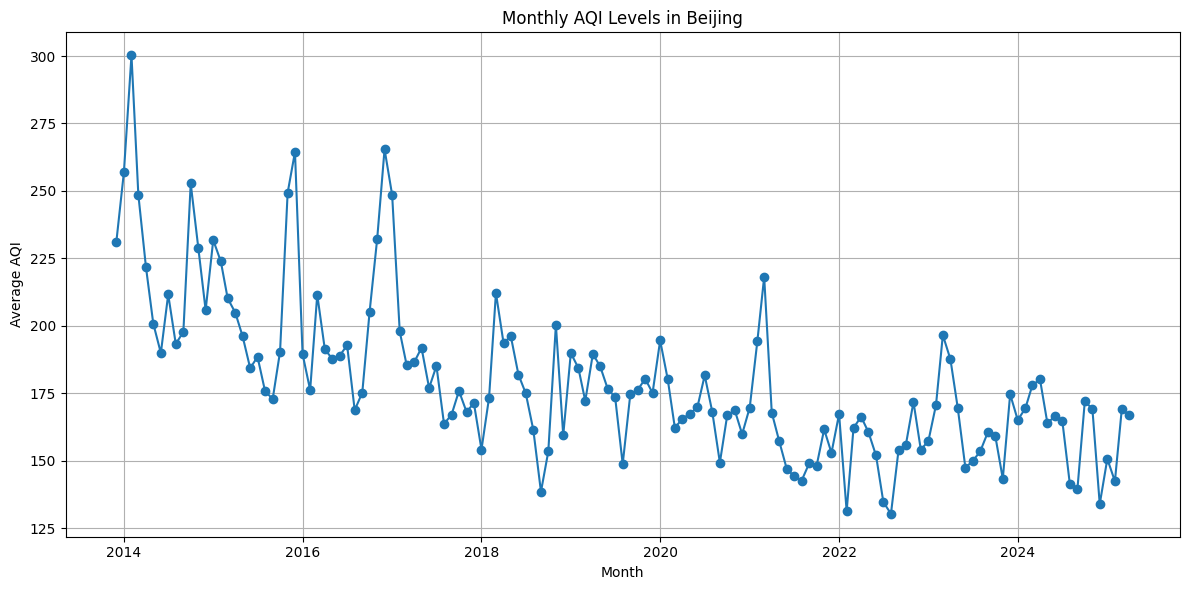

In [22]:
# Query
query = """
SELECT DATE_TRUNC('month', datetime) AS month, AVG(aqi) AS avg_aqi
FROM transformations.final_city_merged mop
JOIN real_time_data.stations s ON mop.station_id = s.station_id
WHERE s.city = 'Beijing (北京)'
GROUP BY month
ORDER BY month;
"""

# Load results into a DataFrame
df = pd.read_sql(query, engine)
df['month'] = pd.to_datetime(df['month'])

# Preview data
print(df.head())

# 📈 Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(df['month'], df['avg_aqi'], marker='o', linestyle='-')
plt.title("Monthly AQI Levels in Beijing")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

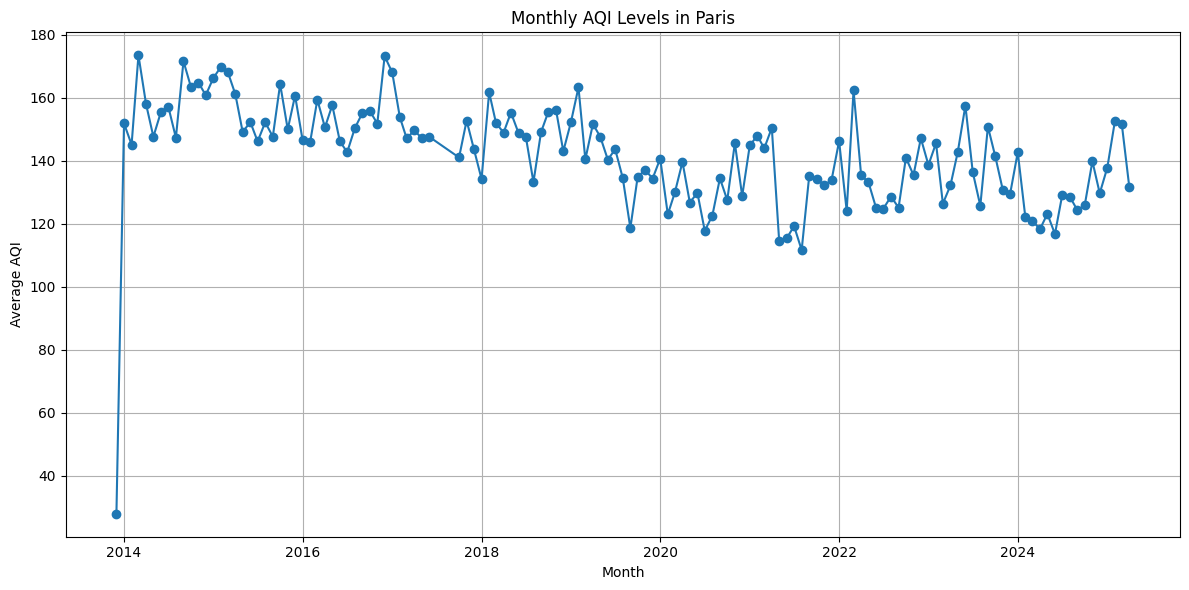

In [23]:
## In France

query = """
SELECT DATE_TRUNC('month', datetime) AS month, AVG(aqi::NUMERIC) AS avg_aqi
FROM transformations.final_city_merged mop
JOIN real_time_data.stations s ON mop.station_id = s.station_id
WHERE s.city = 'Paris'
GROUP BY month
ORDER BY month;
"""

# ✅ Use read_sql_query instead of read_sql
df = pd.read_sql_query(query, engine)
df['month'] = pd.to_datetime(df['month'])

# 📈 Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['month'], df['avg_aqi'], marker='o', linestyle='-')
plt.title("Monthly AQI Levels in Paris")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

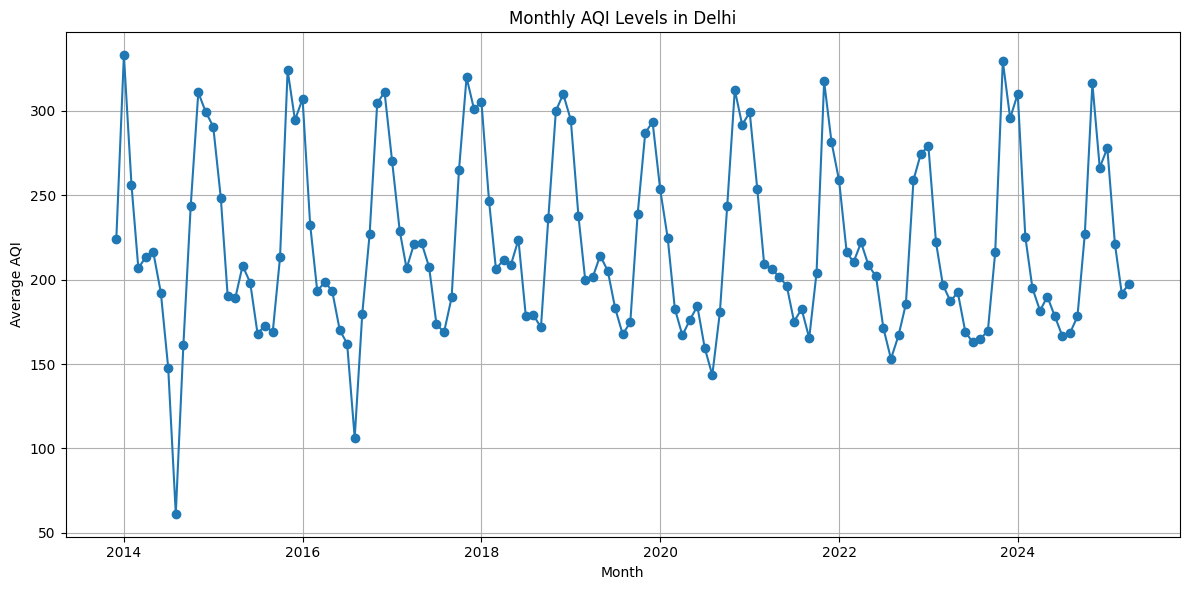

In [24]:
## In India

query = """
SELECT DATE_TRUNC('month', datetime) AS month, AVG(aqi::NUMERIC) AS avg_aqi
FROM transformations.final_city_merged mop
JOIN real_time_data.stations s ON mop.station_id = s.station_id
WHERE s.city = 'Major Dhyan Chand National Stadium, Delhi, Delhi, India'
GROUP BY month
ORDER BY month;
"""

# ✅ Use read_sql_query instead of read_sql
df = pd.read_sql_query(query, engine)
df['month'] = pd.to_datetime(df['month'])

# 📈 Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['month'], df['avg_aqi'], marker='o', linestyle='-')
plt.title("Monthly AQI Levels in Delhi")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

From these plots, we can observe the following insights for each city:

Beijing – Monthly AQI Levels:
- Trend: Steady decline over time.
- 2013–2015: Highly volatile with extreme peaks (up to 300).
- 2016–2024: Noticeable downward trend in AQI values, stabilizing around 150–180.
- Insight: Indicates consistent improvement in air quality, this is due to Beijing's air quality initiatives that we will explore in a while.

Paris – Monthly AQI Levels
- Trend: Gradual decrease from 2014 to around 2020, followed by some fluctuations.
- AQI Range: Mostly between 120–160, with very few extreme peaks.
- 2021–2024: Mild upward fluctuations, but still within moderate levels.
- Insight: Overall, Paris maintains relatively good air quality with slight improvements until 2020 and minor increases afterward.

Delhi – Monthly AQI Levels
- Trend: Highly seasonal and cyclical pattern, with major spikes each year.
- AQI Peaks: Frequently crosses 300, indicating hazardous air quality during certain months.
- No clear downward trend, though post-2020 appears slightly less volatile.
- Insight: Despite some variability, Delhi’s air quality remains consistently poor, likely due to seasonal factors like crop burning and industrial activity.

As a conclusion, we observe that the average AQI in China has been steadily decreasing, dropping from around 300 in 2014 to approximately 150 in recent years. In Paris, the average AQI remains relatively consistent over time, with a slight downward trend. The AQI levels in Paris are mostly between 120–160, and are generally lower than those in Beijing and Delhi. In India, the AQI levels show a consistent pattern with noticeable fluctuations—periodically rising and falling throughout the months. Most AQI readings in India are significantly high, mostly exceeding 200 (very unhealthy).

#### ✅ Top GHE causes by average burden in China, France, and India

In [25]:
# Top GHE causes in China (ignoring the Total category)

query = """
SELECT
    ghe_cause,
    ROUND(AVG(age_standardized_rate::NUMERIC), 2) AS avg_burden
FROM burden_data.china_dataset
WHERE ghe_cause <> 'Total'
GROUP BY ghe_cause
ORDER BY avg_burden DESC;
"""

# Load into DataFrame
df = pd.read_sql(query, engine)
print(df)

                               ghe_cause  avg_burden
0                                 Stroke      764.54
1                Ischaemic Heart Disease      707.81
2  Chronic Obstructive Pulmonary Disease      462.09
3                            Lung Cancer      302.30
4     Acute Lower Respiratory Infections      207.24


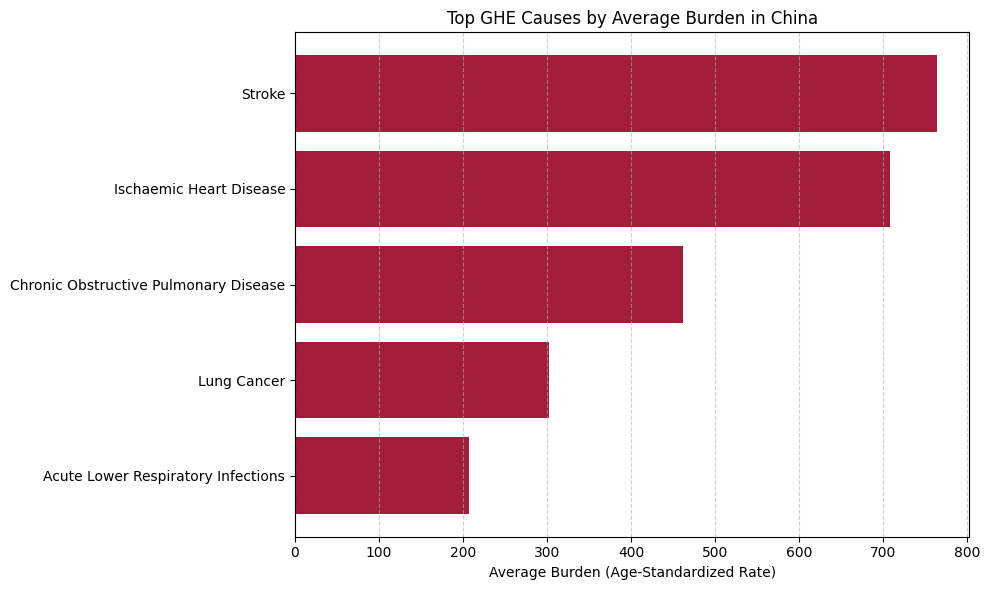

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort to display in descending order
df_sorted = df.sort_values(by='avg_burden', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['ghe_cause'], df_sorted['avg_burden'], color='#a11d3a')
plt.xlabel('Average Burden (Age-Standardized Rate)')
plt.title('Top GHE Causes by Average Burden in China')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [27]:
# Top GHE causes in France

query = """
SELECT
    ghe_cause,
    ROUND(AVG(age_standardized_rate::NUMERIC), 2) AS avg_burden
FROM burden_data.france_dataset
WHERE ghe_cause <> 'Total'
GROUP BY ghe_cause
ORDER BY avg_burden DESC;
"""

# Load into DataFrame
df = pd.read_sql(query, engine)
print(df)

                               ghe_cause  avg_burden
0                Ischaemic Heart Disease      117.71
1                            Lung Cancer       43.28
2                                 Stroke       40.91
3  Chronic Obstructive Pulmonary Disease       20.80
4     Acute Lower Respiratory Infections       17.00


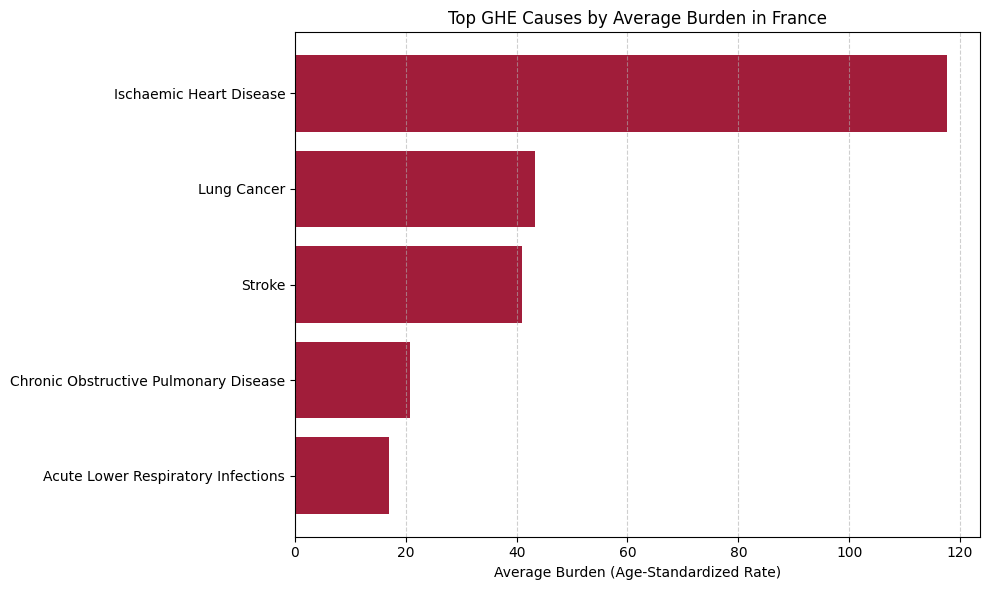

In [28]:
# Sort to display in descending order
df_sorted = df.sort_values(by='avg_burden', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['ghe_cause'], df_sorted['avg_burden'], color='#a11d3a')
plt.xlabel('Average Burden (Age-Standardized Rate)')
plt.title('Top GHE Causes by Average Burden in France')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [29]:
# Top GHE causes in India (ignoring the 'Total' category)

query = """
SELECT
    ghe_cause,
    ROUND(AVG(age_standardized_rate::NUMERIC), 2) AS avg_burden
FROM burden_data.india_dataset
WHERE ghe_cause <> 'Total'
GROUP BY ghe_cause
ORDER BY avg_burden DESC;
"""

# Load into DataFrame
df = pd.read_sql(query, engine)
print(df)

                               ghe_cause  avg_burden
0                Ischaemic Heart Disease     1536.41
1  Chronic Obstructive Pulmonary Disease     1036.27
2     Acute Lower Respiratory Infections     1000.28
3                                 Stroke      603.50
4                            Lung Cancer       90.66


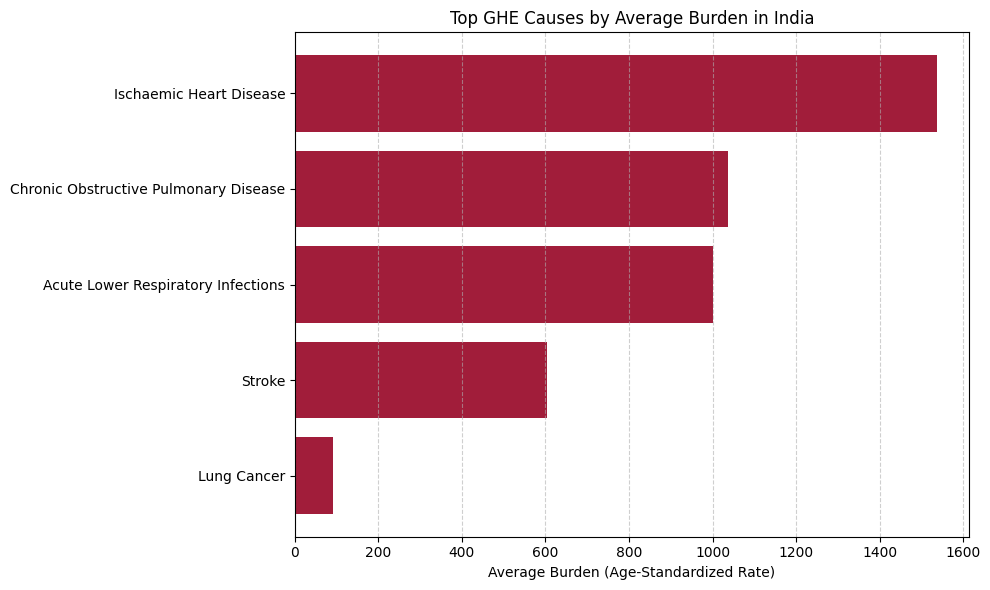

In [30]:
# Sort to display in descending order (ignoring 'Total' for a cleaner chart)
df_sorted = df.sort_values(by='avg_burden', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['ghe_cause'], df_sorted['avg_burden'], color='#a11d3a')
plt.xlabel('Average Burden (Age-Standardized Rate)')
plt.title('Top GHE Causes by Average Burden in India')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

We can observe the following insights and analyses from the above plots:

**China:**
- Stroke is the leading cause of health burden, with the highest age-standardized rate among all causes.
- Ischaemic Heart Disease follows closely, indicating a high cardiovascular disease burden.
- Chronic Obstructive Pulmonary Disease (COPD) and Lung Cancer also contribute significantly, possibly linked to air pollution and smoking.
- Acute Lower Respiratory Infections show a comparatively lower but still notable burden.
- 📌 Insight: China faces a major public health challenge from non-communicable diseases (NCDs), especially cardiovascular and respiratory diseases, which are likely exacerbated by pollution and aging populations.

**France:**
- Ischaemic Heart Disease is the top contributor to health burden.
- Lung Cancer and Stroke follow, with relatively close burden levels.
- COPD and Acute Respiratory Infections are present but less prominent compared to others.
- 📌 Insight: France shows a lower overall burden in comparison to China and India, with most GHE causes relating to chronic lifestyle-related conditions rather than infections.

**India:**
- Ischaemic Heart Disease has the highest burden, exceeding 1500 in standardized rate.
- COPD and Acute Lower Respiratory Infections also have high values, suggesting serious impacts from air pollution, poor healthcare access, and indoor biomass fuel exposure.
- Stroke ranks lower than in China, but still significant.
- Lung Cancer has the lowest burden among the five causes listed.
- 📌 Insight: India shows the highest overall health burden among the three countries, with a mix of chronic and infectious respiratory diseases dominating the top causes.

As a conclusion, the comparison of top Global Health Estimate (GHE) causes across China, France, and India reveals distinct patterns in public health burdens. In China, Stroke emerges as the leading cause of health burden, closely followed by Ischaemic Heart Disease. Respiratory conditions such as Chronic Obstructive Pulmonary Disease (COPD) and Lung Cancer also contribute significantly, likely influenced by air pollution and aging demographics. France, on the other hand, shows a markedly lower overall burden, with Ischaemic Heart Disease leading, followed by Lung Cancer and Stroke. This reflects a predominance of chronic lifestyle-related conditions. In India, the health burden is highest among the three countries, with Ischaemic Heart Disease ranking first, followed by COPD and Acute Lower Respiratory Infections—highlighting the dual impact of air pollution and limited healthcare access. While China and India both face significant challenges from cardiovascular and respiratory diseases, France appears to manage these risks more effectively, possibly due to stronger healthcare systems and preventive measures

#### ✅ Comparing average AQI with health burden (age standardized rate)

C:\Users\MaisoonAboFakher\AppData\Local\Temp\ipykernel_2120\842727208.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   avg_health_burden  avg_aqi  year
0            2753.53   231.00  2013
1            2529.59   225.40  2014
2            2366.86   207.64  2015
3            2222.16   198.96  2016
4            2119.22   185.05  2017
5            1955.34   174.94  2018
6            1852.94   177.11  2019


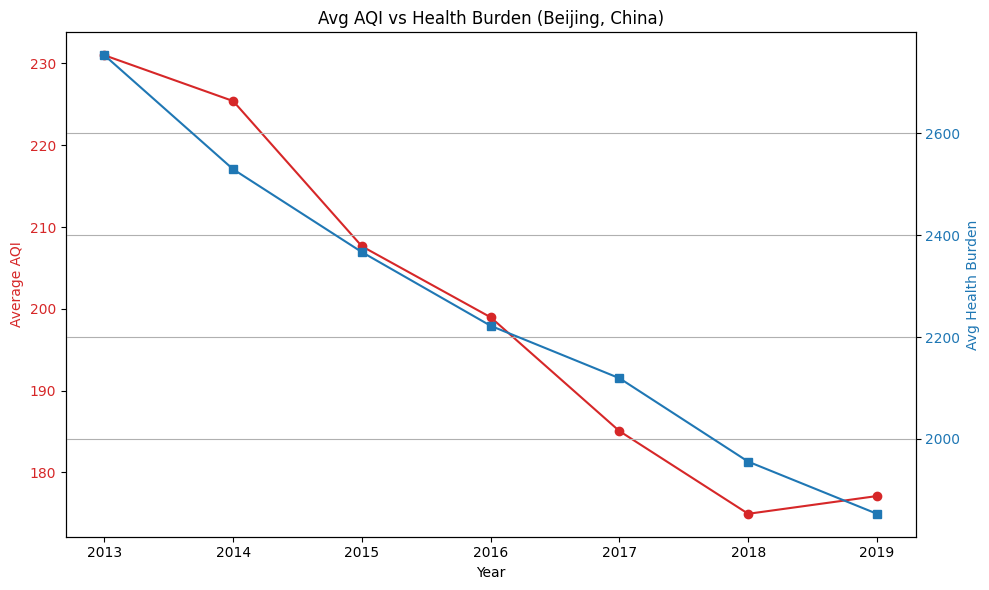

In [31]:
# Comparing Average AQI with Health burden (age standardized rate) in China

query = """
SELECT
    ROUND(AVG(m.age_standardized_rate::NUMERIC), 2) AS avg_health_burden,
    ROUND(AVG(m.avg_aqi::NUMERIC), 2) AS avg_aqi,
    m.year
FROM transformations.final_city_burden_merged m
JOIN real_time_data.stations s
  ON m.station_id = s.station_id
WHERE s.city ILIKE '%beijing%'
AND m.ghe_cause = 'Total'
GROUP BY year
ORDER BY year;
"""

# --- Execute & Fetch ---
conn = psycopg2.connect(**db_config)
df = pd.read_sql_query(query, conn)
conn.close()

print(df)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average AQI', color='tab:red')
ax1.plot(df['year'], df['avg_aqi'], marker='o', color='tab:red', label='Average AQI')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Health Burden', color='tab:blue')
ax2.plot(df['year'], df['avg_health_burden'], marker='s', color='tab:blue', label='Avg Health Burden')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Avg AQI vs Health Burden (Beijing, China)')
fig.tight_layout()
plt.grid(True)
plt.show()

C:\Users\MaisoonAboFakher\AppData\Local\Temp\ipykernel_2120\1567929713.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   avg_health_burden  avg_aqi  year
0             253.39    28.00  2013
1             226.32   158.06  2014
2             237.30   157.20  2015
3             217.58   152.96  2016
4             214.93   150.63  2017
5             211.08   148.63  2018
6             197.53   141.41  2019


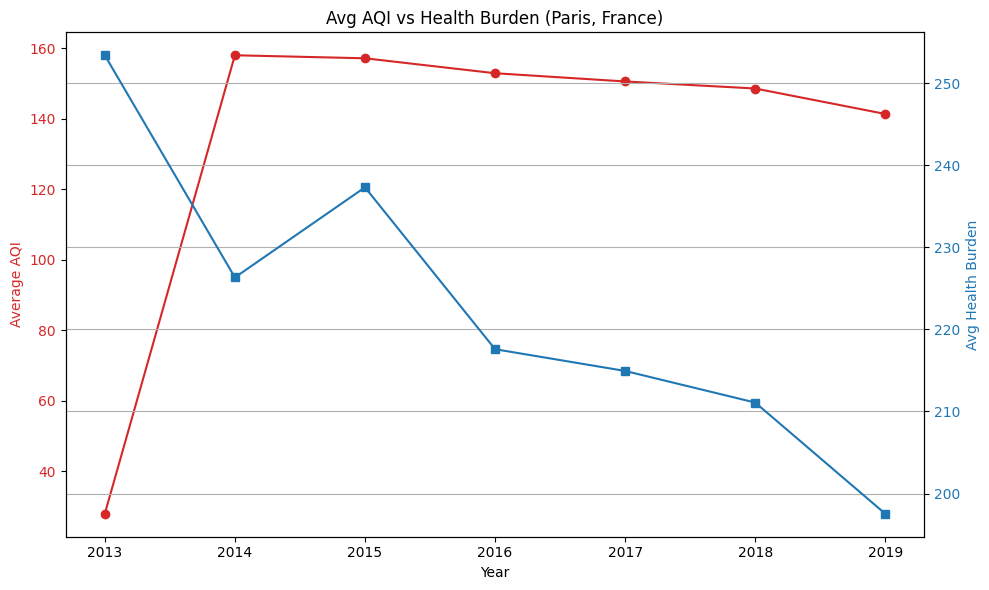

In [32]:
# Comparing Average AQI with Health burden (age standardized rate) in France

query = """
SELECT
    ROUND(AVG(m.age_standardized_rate::NUMERIC), 2) AS avg_health_burden,
    ROUND(AVG(m.avg_aqi::NUMERIC), 2) AS avg_aqi,
    m.year
FROM transformations.final_city_burden_merged m
JOIN real_time_data.stations s
  ON m.station_id = s.station_id
WHERE s.city ILIKE '%Paris%'
AND m.ghe_cause = 'Total'
GROUP BY year
ORDER BY year;
"""

# --- Execute & Fetch ---
conn = psycopg2.connect(**db_config)
df = pd.read_sql_query(query, conn)
conn.close()

print(df)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average AQI', color='tab:red')
ax1.plot(df['year'], df['avg_aqi'], marker='o', color='tab:red', label='Average AQI')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Health Burden', color='tab:blue')
ax2.plot(df['year'], df['avg_health_burden'], marker='s', color='tab:blue', label='Avg Health Burden')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Avg AQI vs Health Burden (Paris, France)')
fig.tight_layout()
plt.grid(True)
plt.show()

C:\Users\MaisoonAboFakher\AppData\Local\Temp\ipykernel_2120\1199169556.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   avg_health_burden  avg_aqi  year
0            4646.39   224.00  2013
1            4390.71   223.48  2014
2            4208.48   223.18  2015
3            4014.14   226.03  2016
4            3806.65   231.65  2017
5            3691.52   231.41  2018
6            3481.03   224.62  2019


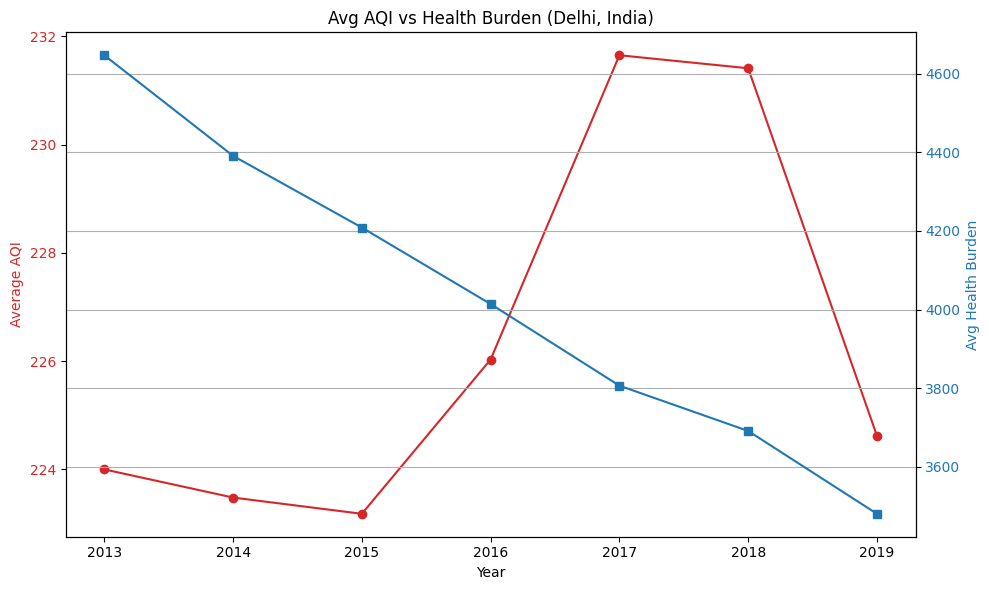

In [33]:
# Comparing Average AQI with Health burden (age standardized rate) in India

query = """
SELECT
    ROUND(AVG(m.age_standardized_rate::NUMERIC), 2) AS avg_health_burden,
    ROUND(AVG(m.avg_aqi::NUMERIC), 2) AS avg_aqi,
    m.year
FROM transformations.final_city_burden_merged m
JOIN real_time_data.stations s
  ON m.station_id = s.station_id
WHERE s.city ILIKE '%Delhi%'
AND m.ghe_cause = 'Total'
GROUP BY year
ORDER BY year;
"""

# --- Execute & Fetch ---
conn = psycopg2.connect(**db_config)
df = pd.read_sql_query(query, conn)
conn.close()

print(df)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average AQI', color='tab:red')
ax1.plot(df['year'], df['avg_aqi'], marker='o', color='tab:red', label='Average AQI')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Health Burden', color='tab:blue')
ax2.plot(df['year'], df['avg_health_burden'], marker='s', color='tab:blue', label='Avg Health Burden')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Avg AQI vs Health Burden (Delhi, India)')
fig.tight_layout()
plt.grid(True)
plt.show()

From the above plots we have derived the following insights. We have also researched to find justifications of why these trends have occured in each city

**Beijing, China:** Sharp Decline in AQI and Health Burden
Insights:
- Both average AQI and average health burden (age-standardized rate) show a consistent decline from 2013 to 2019.
- AQI dropped from 231 in 2013 to 177 in 2019, while health burden decreased from 2753.53 to 1852.94.

Why this is happening:
- The Chinese government launched aggressive anti-pollution campaigns starting around 2013–2014, including the “War on Pollution,” which led to:
    - Closure or relocation of heavy industries from urban centers.
    - Massive investment in renewable energy and clean transportation.
    - Implementation of air quality monitoring and PM2.5 reduction policies.

These environmental efforts directly contributed to better air quality, and over time, resulted in lower incidence of air-pollution-related diseases (e.g., stroke, COPD, and heart disease).

📌 Conclusion: Beijing presented a successful case of how policy-driven environmental reforms yield measurable public health benefits within a relatively short span.

**Paris, France:** Modest Improvement in AQI, Gradual Decline in Health Burden
Insights:
- Health burden decreased from 253.39 to 197.53, but AQI remained relatively stable—only dropping slightly from 158.06 to 141.41 between 2014 and 2019.
- Unlike China, the AQI line is fairly flat, with small fluctuations.
- Why this is happening:
    - France already had moderately good air quality before 2014, due to:
        - Well-established environmental regulations and clean public transportation systems.
        - Lesser dependence on coal and heavy industry within city centers.

The decline in health burden is likely influenced more by healthcare system improvements, public health campaigns, and early disease detection rather than major air quality interventions.

📌 Conclusion: In Paris, the health burden reduction appears to stem from a combination of stable air quality and strong healthcare infrastructure, rather than dramatic environmental changes.

**Delhi, India:** Stagnant AQI, Declining Health Burden – A Complex Relationship
Insights:
- Health burden decreased substantially from 4646.39 to 3481.03, while AQI remained persistently high, fluctuating around the 224–231 range.
- AQI even peaked in 2017, despite a continuing decline in health burden.
- Why this is happening:
    - India, especially Delhi, has faced persistent air pollution issues, driven by:
        - Crop stubble burning in neighboring states (especially during winter).
        - Vehicular emissions and diesel generators in densely populated areas.
        - Industrial emissions and construction dust, compounded by weak enforcement of environmental norms.
    - However, the declining health burden may be due to:
        - Expansion of healthcare access, improved vaccination coverage, and public health campaigns.
        - Better diagnosis and treatment of chronic diseases.
        - Rising urban health awareness and personal healthcare spending.

📌 Conclusion: Delhi demonstrates a disconnect between environmental and health trends—where health outcomes improve due to medical and systemic advancements, but pollution remains a major unresolved threat.

As a conclusion, from 2013 to 2019, Beijing shows a strong link between declining air pollution and reduced health burden, reflecting the impact of China’s environmental reforms. Paris demonstrates steady health improvements with relatively stable air quality, likely due to its strong healthcare system. In Delhi, health burden decreased significantly despite consistently high AQI levels, suggesting healthcare progress but also highlighting the urgent need for stricter pollution control. These trends emphasize the importance of combining environmental and health policies for sustainable outcomes.